<a href="https://colab.research.google.com/github/doryeng/web1/blob/master/Gold_Price_Predict_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gold Price Prediction Using Python & LSTM(Long Short-Term Memory)
Reference : randerson112358

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
df = web.DataReader('GC=F', data_source='yahoo', start='2000-01-01') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-02-28,292.500000,292.299988,292.299988,292.500000,4.0,292.500000
2000-02-29,292.399994,292.399994,292.399994,292.399994,7.0,292.399994
2000-03-01,291.500000,291.500000,291.500000,291.500000,0.0,291.500000
2000-03-02,291.500000,288.000000,288.200012,288.200012,100.0,288.200012
2000-03-03,288.799988,288.799988,288.799988,288.799988,10.0,288.799988
...,...,...,...,...,...,...
2020-07-23,1897.699951,1867.300049,1867.900024,1885.400024,198332358.0,1885.400024
2020-07-24,1904.599976,1880.500000,1889.000000,1900.300049,156332360.0,1900.300049
2020-07-26,1911.900024,1899.000000,1901.199951,1911.199951,1233176.0,1911.199951


In [ ]:
df.shape

(5117, 6)

Visualize the closing price history

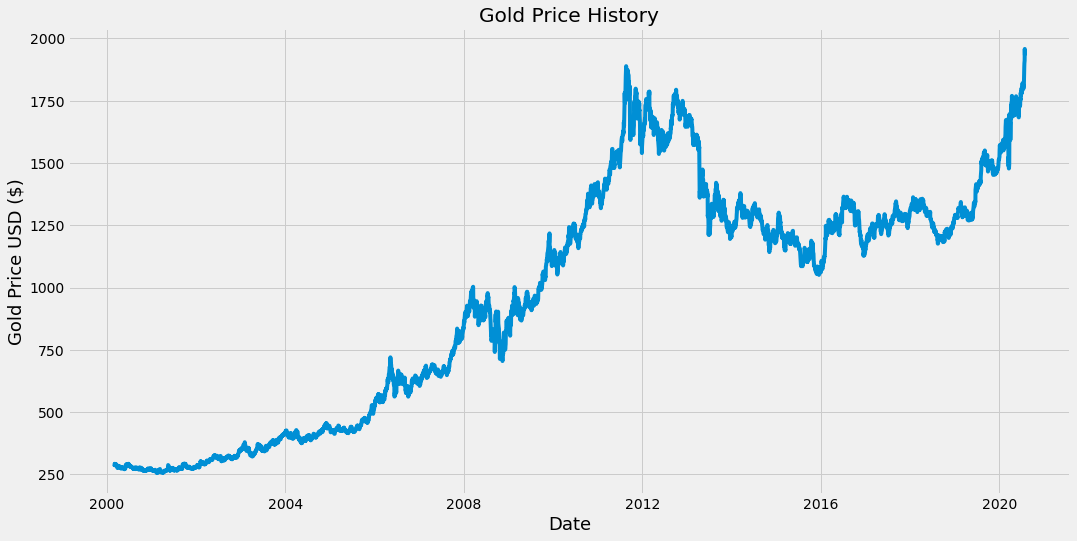

In [21]:
plt.figure(figsize=(16,8))
plt.title('Gold Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Gold Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

Now scale the data set to be values between 0 and 1 inclusive, I do this because it is generally good practice to scale your data before giving it to the neural network.

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

Create a training data set that contains the past 60 day closing price values that we want to use to predict the 61st closing price value.
So the first column in the ‘x_train’ data set will contain values from the data set from index 0 to index 59 (60 values total) and the second column will contain values from the data set from index 1 to index 60 (60 values) and so on and so forth.
The ‘y_train’ data set will contain the 61st value located at index 60 for it’s first column and the 62nd value located at index 61 of the data set for it’s second value and so on and so forth.

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

Now convert the independent train data set ‘x_train’ and dependent train data set ‘y_train’ to numpy arrays so they can be used for training the LSTM model.

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

Reshape the data to be 3-dimensional in the form [number of samples, number of time steps, and number of features]. The LSTM model is expecting a 3-dimensional data set.

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

Build the LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

Compile the model using the mean squared error (MSE) loss function and the adam optimizer.

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Train the model using the training data sets. Note, fit is another name for train. Batch size is the total number of training examples present in a single batch, and epoch is the number of iterations when an entire data set is passed forward and backward through the neural network.

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)   # epochs=20~50 정도의 범위가 적합

Epoch 1/20
4034/4034 [==============================] - 139s 34ms/step - loss: 8.0247e-04
Epoch 2/20
4034/4034 [==============================] - 138s 34ms/step - loss: 2.9828e-04
Epoch 3/20
4034/4034 [==============================] - 138s 34ms/step - loss: 2.1807e-04
Epoch 4/20
4034/4034 [==============================] - 135s 33ms/step - loss: 1.9838e-04
Epoch 5/20
4034/4034 [==============================] - 135s 33ms/step - loss: 1.9498e-04
Epoch 6/20
4034/4034 [==============================] - 135s 34ms/step - loss: 1.4289e-04
Epoch 7/20
4034/4034 [==============================] - 135s 33ms/step - loss: 1.7306e-04
Epoch 8/20
4034/4034 [==============================] - 135s 33ms/step - loss: 1.3923e-04
Epoch 9/20
4034/4034 [==============================] - 136s 34ms/step - loss: 1.3652e-04
Epoch 10/20
4034/4034 [==============================] - 136s 34ms/step - loss: 1.2604e-04
Epoch 11/20
4034/4034 [==============================] - 136s 34ms/step - loss: 1.2555e-04
Epoch 12

Create a test data set.

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

Then convert the independent test data set ‘x_test’ to a numpy array so it can be used for testing the LSTM model.

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

Reshape the data to be 3-dimensional in the form [number of samples, number of time steps, and number of features]. This needs to be done, because the LSTM model is expecting a 3-dimensional data set.

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

Now get the predicted values from the model using the test data.

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

Get the root mean squared error (RMSE), which is a good measure of how accurate the model is. A value of 0 would indicate that the models predicted values match the actual values from the test data set perfectly.
The lower the value the better the model performed. But usually it is best to use other metrics as well to truly get an idea of how well the model performed.

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

13.590939677629784

Let’s plot and visualize the data.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


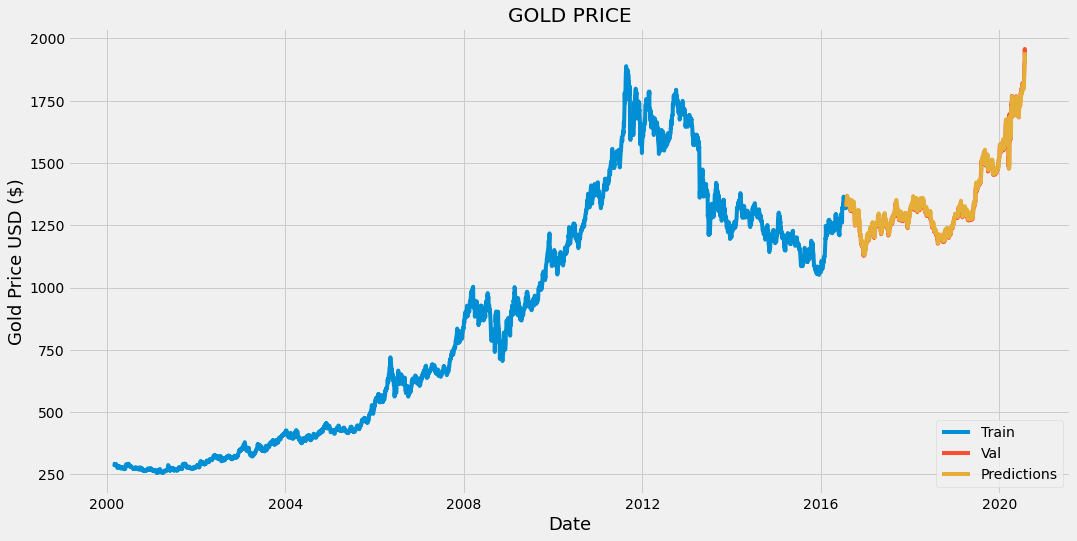

In [22]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('GOLD PRICE')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Gold Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()